Zadanie: przestępczość

In [1]:
# Zadanie 1 wczytanie dancyh i bibliotek

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
# 1 Wczytywanie danych
df = pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Tworzenie Tabeli przestawnej

In [77]:
# 2 Zamiana tabeli na tabelę przestawną
pivot_table = df.pivot_table(
    values='id',
    index='race', 
    columns='signs_of_mental_illness', 
    aggfunc='count'
)
print(pivot_table)


signs_of_mental_illness  False  True 
race                                 
A                           69     24
B                         1114    184
H                          745    157
N                           64     14
O                           37     11
W                         1763    713


#Zadanie 3 Odsetek choroby psychicznej dla ras.

In [78]:

pivot_table['mental_illness_percentage'] = pivot_table[True] / (pivot_table[True] + pivot_table[False]) * 100
pivot_table['mental_illness_percentage'] = pivot_table['mental_illness_percentage'].apply(lambda x: f"{x:.2f}%")
pivot_table.sort_values(by='mental_illness_percentage', ascending=False, inplace=True)
pivot_table



signs_of_mental_illness,False,True,mental_illness_percentage
race,,,
W,1763,713,28.80%
A,69,24,25.81%
O,37,11,22.92%
N,64,14,17.95%
H,745,157,17.41%
B,1114,184,14.18%


In [79]:
# 4 Dodanie kolumny z dniem tygodnia
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()

day_counts = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print(df[['date', 'day_of_week']].head())


        date day_of_week
0 2015-01-02      Friday
1 2015-01-02      Friday
2 2015-01-03    Saturday
3 2015-01-04      Sunday
4 2015-01-04      Sunday


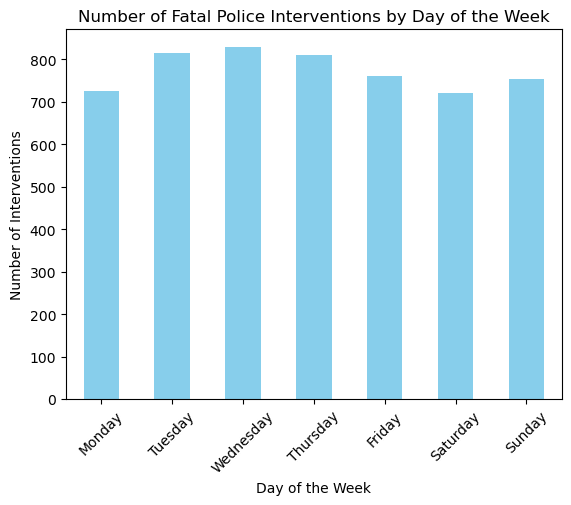

In [9]:
# Tworzenie wykresu
day_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Fatal Police Interventions by Day of the Week')
plt.ylabel('Number of Interventions')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()


Zadanie 5

In [80]:
url = 'https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population'
tables = pd.read_html(url)
df_new1 = tables[0]
df_new1.columns = [1,2, "State", "population" ,5,6,7,8,9,10,11]
df_new1.head()

,1,2,State,population,5,6,7,8,9,10,11
0,1,1,California,38538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%


In [114]:
url = 'https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States'
tables = pd.read_html(url)
df_new2 = tables[1]

df_new2.columns = ["state","abbr",3,4,5,6,7,8,9]
df_new2.head()

,state,abbr,3,4,5,6,7,8,9
0,Alabama,AL,Montgomery,Huntsville,"Dec 14, 1819",5024279,52420,135767,7
1,Alaska,AK,Juneau,Anchorage,"Jan 3, 1959",733391,665384,1723337,1
2,Arizona,AZ,Phoenix,Phoenix,"Feb 14, 1912",7151502,113990,295234,9
3,Arkansas,AR,Little Rock,Little Rock,"Jun 15, 1836",3011524,53179,137732,4
4,California,CA,Sacramento,Los Angeles,"Sep 9, 1850",39538223,163695,423967,52


In [115]:
# Tworzenie tabeli przestawnej, która liczy liczbę incydentów dla każdego stanu
pivot_table_cases = pd.pivot_table(df, 
                                   index='state', 
                                   aggfunc='size').reset_index(name='case_count')


In [116]:
merged_df = pd.merge(df_new1, df_new2, left_on='State', right_on="state", how='left')
merged_df_3 = pd.merge(pivot_table_cases, df_new2, left_on='state', right_on="abbr", how='left')


In [117]:
merged_df.columns

Index([           1,            2,      'State', 'population',        '5_x',
              '6_x',        '7_x',        '8_x',        '9_x',           10,
                 11,      'state',       'abbr',            3,            4,
              '5_y',        '6_y',        '7_y',        '8_y',        '9_y'],
      dtype='object')

In [118]:
merged_df_3.columns

Index(['state_x', 'case_count', 'state_y', 'abbr', 3, 4, 5, 6, 7, 8, 9], dtype='object')

In [122]:
final_merged_df = pd.merge(merged_df_3, 
                           merged_df[['State', 'population']], 
                           left_on='state_y', 
                           right_on='State', 
                           how='left')
final_merged_df['incidents_per_1000'] = (final_merged_df['case_count'] / final_merged_df['population']) * 1000


In [123]:
final_merged_df[['state_y', 'abbr', 'population', 'case_count', 'incidents_per_1000']]

,state_y,abbr,population,case_count,incidents_per_1000
0,Alaska,AK,733391.0,39,0.053178
1,Alabama,AL,5024279.0,104,0.020699
2,Arkansas,AR,3011524.0,83,0.027561
3,Arizona,AZ,7151502.0,254,0.035517
4,California,CA,38538223.0,799,0.020733
5,Colorado,CO,5773714.0,195,0.033774
6,Connecticut,CT,3605944.0,21,0.005824
7,NaN,NaN,NaN,13,NaN
8,Delaware,DE,989948.0,13,0.013132
9,Florida,FL,21538187.0,350,0.016250
